In [1]:
## 60 minutes turtorial
import torch
import pandas
import numpy
from __future__ import print_function

# PyTorch是什么?
基于Python的科学计算包,作为NumPy的替代品，可以使用GPU的强大计算能力

## 开始
Tensors（张量）
Tensors与Numpy中的 ndarrays类似，但是在PyTorch中 Tensors 可以使用GPU进行计算.

官方文档（英文）：https://pytorch.org/tutorials/beginner/basics/intro.html

In [ ]:
## 创建torch矩阵(tensor)
x=torch.rand(5,3) ## 随机初始化的5*3矩阵
print(x)

x=torch.zeros(5,3,dtype=torch.long) ## 元素全为0的矩阵，且dtype为long型
print(x)

y=[5.5, 3]
print(type(y))
x=torch.tensor(y,dtype=float) ## 利用已有的变量创建tensor
print(type(x))

x=x.new_ones(5,3,dtype=torch.double) ## 利用 .new_方法创建
print(x)
x=torch.rand_like(x,dtype=torch.float) ## 利用已有的tensor来创建tensor，修改其中的dtype和值
print(x)

tensor([[0.0562, 0.8256, 0.4992],
        [0.9243, 0.2769, 0.3914],
        [0.7709, 0.2619, 0.7638],
        [0.9080, 0.9166, 0.8152],
        [0.6670, 0.4145, 0.9862]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
<class 'list'>
<class 'torch.Tensor'>
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.3495, 0.0867, 0.7126],
        [0.1696, 0.7032, 0.7369],
        [0.4513, 0.3695, 0.9270],
        [0.5860, 0.2533, 0.7891],
        [0.3268, 0.8336, 0.9732]])


In [ ]:
## 查看tensor的大小（维度）
x=torch.rand(5,5)
print(x.size()) ## tensor对象的size()方法
print(numpy.shape(x)) ## 也可以用Numpy的.shape()方法来看

torch.Size([5, 5])
torch.Size([5, 5])


In [ ]:
## tensor的基本运算（向量/矩阵的运算）
x=torch.rand(5,3)
y=torch.rand(5,3)

print(x,'\n',y)

## 和/差
print(x+y,end='\n') ## 同torch.add(x,y,out=result)，即把x+y结果赋值给result
print(x-y,end='\n')
## 加+替换
print(y,'\n')
y.add_(x)
print(y,'\n') ## 这里的y是上面的y+x的结果

## 内积(点乘)
u=torch.rand(3,2) 
v=torch.rand(3,2)
print(u.mul(v)) ## 返回仍然是3*2矩阵

## 外积（叉乘）
v1=torch.rand(2,3)
print(u.mm(v1)) ## 返回3*3矩阵


tensor([[0.7390, 0.6934, 0.2904],
        [0.7418, 0.3694, 0.4659],
        [0.7739, 0.1498, 0.4241],
        [0.0423, 0.6288, 0.7418],
        [0.1421, 0.9332, 0.3781]]) 
 tensor([[0.6509, 0.9598, 0.8643],
        [0.6600, 0.6204, 0.9420],
        [0.0631, 0.0263, 0.6607],
        [0.4011, 0.3443, 0.5807],
        [0.8434, 0.9359, 0.2885]])
tensor([[1.3899, 1.6531, 1.1547],
        [1.4018, 0.9897, 1.4079],
        [0.8370, 0.1760, 1.0848],
        [0.4434, 0.9731, 1.3226],
        [0.9856, 1.8691, 0.6666]])
tensor([[ 0.0881, -0.2664, -0.5740],
        [ 0.0818, -0.2510, -0.4761],
        [ 0.7108,  0.1235, -0.2366],
        [-0.3589,  0.2844,  0.1611],
        [-0.7013, -0.0026,  0.0896]])
tensor([[0.6509, 0.9598, 0.8643],
        [0.6600, 0.6204, 0.9420],
        [0.0631, 0.0263, 0.6607],
        [0.4011, 0.3443, 0.5807],
        [0.8434, 0.9359, 0.2885]]) 

tensor([[1.3899, 1.6531, 1.1547],
        [1.4018, 0.9897, 1.4079],
        [0.8370, 0.1760, 1.0848],
        [0.4434, 0.9731,

#### Note
任何以``_`` 结尾的操作都会用结果替换原变量. 例如: ``x.copy_(y)``, ``x.t_()``, 都会改变 ``x``.

In [ ]:
## 你可以使用与NumPy索引方式相同的操作来进行对张量的操作
x=torch.rand(5,3)
print(x)
print(x[:,1]) ## 取第2列
print(x[0,:]) ## 取第1行
print(x[[0,1],0]) ## 取第1和2行第1列
print(x[0:3,2]) ## 取第1~3行第3列
print(x[0:3,0:2]) ## 取第1~3行的第1~2列

tensor([[0.7207, 0.0650, 0.0971],
        [0.7246, 0.4739, 0.9673],
        [0.5314, 0.2313, 0.5161],
        [0.0577, 0.2983, 0.1883],
        [0.9652, 0.3071, 0.2167]])
tensor([0.0650, 0.4739, 0.2313, 0.2983, 0.3071])
tensor([0.7207, 0.0650, 0.0971])
tensor([0.7207, 0.7246])
tensor([0.0971, 0.9673, 0.5161])
tensor([[0.7207, 0.0650],
        [0.7246, 0.4739],
        [0.5314, 0.2313]])


#### 这里将numpy的切片和R语言的数据框切片对比
唯一的差别在于numpy的行列号是从0开始的，并且是左闭右开,eg：
x[0:3,1:2]，即从第1行~第3行(2)，第2列(1:2，左闭右开)，相当于x[0:3,1]

In [ ]:
## 改变tensor的维度和大小
x=torch.rand(5,3)
print(x)
y=x.view(15)
print(np.shape(y))
z=x.view(3,5)
print(z) ## 这里和转置不一样，是近似于先把原来的tensor转化成一个list，然后再重新按照行列要求生成一个tensor

print(x.view(-1,15)) ## 这里的-1是我们不想算有几行，让电脑帮我们算

tensor([[0.2695, 0.0708, 0.9701],
        [0.5879, 0.1375, 0.8139],
        [0.8244, 0.1891, 0.1865],
        [0.6628, 0.0333, 0.0504],
        [0.3394, 0.6291, 0.7110]])
torch.Size([15])
tensor([[0.2695, 0.0708, 0.9701, 0.5879, 0.1375],
        [0.8139, 0.8244, 0.1891, 0.1865, 0.6628],
        [0.0333, 0.0504, 0.3394, 0.6291, 0.7110]])
tensor([[0.2695, 0.0708, 0.9701, 0.5879, 0.1375, 0.8139, 0.8244, 0.1891, 0.1865,
         0.6628, 0.0333, 0.0504, 0.3394, 0.6291, 0.7110]])


In [ ]:
## 获取tensor中的元素
x=torch.rand(1,1)
print(x)
y=x.item() ## 返回float类型
print(y)
print(type(y))

tensor([[0.3472]])
0.3471795320510864
<class 'float'>


Read later:

100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described here <https://pytorch.org/docs/torch>_.

## NumPy 和 Tensor 转换
将一个Torch Tensor转换为NumPy数组是一件轻松的事，反之亦然。

Torch Tensor与NumPy数组共享底层内存地址，修改一个会导致另一个的变化。

In [ ]:
## 将Torch Tensor转换为NumPy数组
## numpy转tensor
x=numpy.ones(3)
print(x)
y=torch.tensor(x)
print(y)
z=torch.from_numpy(x)
print(z)

y.add_(1)
print(x)
print(y) ## 这里发现x并没有随着y变化，原因是这里是用y来等于x，相当于y在更上层一点，先创建的更底层
print(z)

print('\n','\n')

## tensor转numpy
x=torch.ones(3)
print(x)
y=x.numpy()
print(y)
z=numpy.mat(x)

x.add_(1)
print(x)
print(y)
print(z) ## 不论是x,y,z都变化，即如果先创建了torch.tensor，那么修改tensor就会引起其他的numpy array或者Matrix的变化

[1. 1. 1.]
tensor([1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1.], dtype=torch.float64)
[1. 1. 1.]
tensor([2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1.], dtype=torch.float64)

 

tensor([1., 1., 1.])
[1. 1. 1.]
tensor([2., 2., 2.])
[2. 2. 2.]
[[2. 2. 2.]]


#### note：不要轻易地使用numpy和tensor之间相互转化，避免出错，如果要使用最好是先创建numpy对象再转化成tensor，这样不会造成改变

所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到NumPy 的转换.

## 创建CUDA Tensor

使用``.to`` 方法 可以将Tensor移动到任何设备中

In [ ]:
# torch.cuda.is_available 函数判断是否有cuda可以使用
# ``torch.device``将张量移动到指定的设备中
print(torch.cuda.is_available()) ## 现在pytorch只支持从CUDA 10.1往上的了，本机就只有9.1

if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA 设备对象
    y = torch.ones_like(x, device=device)  # 直接从GPU创建张量
    x = x.to(device)                       # 或者直接使用``.to("cuda")``将张量移动到cuda中
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 也会对变量的类型做更改

False


#### 关于CUDA和pytorch，可以看下面几个很有用的资料
windows下cuda的安装：https://www.cnblogs.com/arxive/p/11198420.html

GPU之nvidia-smi命令详解：https://www.jianshu.com/p/ceb3c020e06b

Pytorch cpu版本安装教程（附加GPU版本安装教程）：https://blog.csdn.net/qq_41375318/article/details/102483339?utm_term=torch%E7%9A%84cpu%E7%89%88%E6%9C%AC&utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~sobaiduweb~default-0-102483339&spm=3001.4430

# Autograd: 自动求导机制
PyTorch 中所有神经网络的核心是 ``autograd`` 包。

``autograd``包为张量上的所有操作提供了自动求导。
它是一个在运行时定义的框架，这意味着反向传播是根据你的代码来确定如何运行，并且每次迭代可以是不同的。

## 张量（Tensor）
``torch.Tensor``是这个包的核心类。如果设置``.requires_grad`` 为 ``True``，那么将会追踪所有对于该张量的操作。 
当完成计算（正向传播）后通过调用 ``.backward()``，自动计算所有的梯度（反向传播），这个张量的所有梯度将会自动积累到 ``.grad`` 属性。

要阻止张量跟踪历史记录，可以调用``.detach()``方法将其与计算历史记录分离，并禁止跟踪它将来的计算记录。

为了防止跟踪历史记录（和使用内存），可以将代码块包装在``with torch.no_grad()：``中。这在评估模型时特别有用，因为模型可能具有`requires_grad = True`的可训练参数，但是我们不需要梯度计算。

## Function
在自动梯度计算中还有另外一个重要的类``Function``.
``Tensor`` 和 ``Function``互相连接并生成一个非循环图，它表示和存储了完整的计算历史。
每个张量都有一个``.grad_fn``属性，这个属性引用了一个创建了``Tensor``的``Function``（除非这个张量是用户手动创建的，即，这个张量的
``grad_fn`` 是 ``None``）。

grad_fn属性是记录了在这个节点，求导的类型，假设y=x+3，这里y.grad_fn就是一个sumXXX的，表明这里对x的求导是加和的求导

In [ ]:
## 训练一个简单的神经网络体会一下自动求导的功能
import torch

In [ ]:
x=torch.ones(2,2,requires_grad=True) ## 设置一个tensor的requires_grad为True这样torch就可以自动为它计算梯度
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y=x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


结果``y``已经被计算出来了（forward propogation），所以，``grad_fn``已经被自动生成了。

In [ ]:
print(y.grad_fn) ## y的grad_fn属性

In [ ]:
z=y*y*3 ## 对y进行一个操作，得到的z和out仍然具有grad_fn属性
out=z.mean()

print(z,'\n',out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 
 tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` 可以改变现有张量的 ``requires_grad``属性。如果没有指定的话，默认输入的flag是 ``False``。

In [ ]:
a=torch.rand(2,2) ## 这里没有设置a的requires_grad为True
b=(a*3)/(a-1)
print(b)
b.requires_grad_(True) ## 将原本没有设置requires_grad的b设置上需要求导
print(b)
print(b.grad_fn) ## 由于从b开始才需要计算gradient所以这里b并没有梯度
c=(b*b).sum()
print(c.grad_fn) ## 求和梯度

tensor([[ -3.6742, -16.7124],
        [ -2.7443,  -1.4810]])
tensor([[ -3.6742, -16.7124],
        [ -2.7443,  -1.4810]], requires_grad=True)
None


## 梯度 (gradient)
如果需要计算导数，你可以在``Tensor``上调用``.backward()``。 
如果``Tensor``是一个标量（即它只包含一个元素数据）则不需要为``backward()``指定任何参数，
但是如果它有更多的元素，你需要指定一个``gradient`` 参数来匹配张量的形状。

反向传播产生梯度（就是从output到每个中间变量的导数）
因为 ``out``是一个纯量（scalar），``out.backward()`` 等于``out.backward(torch.tensor(1))``。

``.backward()``相当于对指定位置求梯度，因为除了叶子节点，其他中间节点的梯度不会被保留，需要通过``.backward(torch.tensor)``来求，这里面的torch.tensor要和待求位置的tensor同型

参考:https://zhuanlan.zhihu.com/p/33478562?from_voters_page=true

In [ ]:
out.backward()

print gradients d(out)/dx

In [ ]:
print(x.grad) ## 这里就计算出了out对于x的梯度，从神经网络我们可以知道，x和out之间并不一定是一个相邻层的关系

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


得到矩阵 ``4.5``将 ``out``叫做
*Tensor* “$o$”.

得到:

$o = \frac{1}{4}\sum_i z_i$,

$z_i = 3(x_i+2)^2$ 和 $z_i\bigr\rvert_{x_i=1} = 27$.

因此,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, 则
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$

即，$out=\frac{1}{4}\sum_i (3*(x_i+2)^2)$，$\frac{\partial out}{\partial x_i}=4.5$

在数学上，如果我们有向量值函数 $\vec{y} = f(\vec{x})$ ，且 $\vec{y}$ 关于 $\vec{x}$ 的梯度是一个雅可比矩阵(Jacobian matrix)：

$J = \begin{pmatrix} \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}} \end{pmatrix}$

一般来说，`torch.autograd`就是用来计算vector-Jacobian product的工具。也就是说，给定任一向量 $v=(v_{1}\;v_{2}\;\cdots\;v_{m})^{T}$ ，计算 $v^{T}\cdot J$ ，如果 $v$ 恰好是标量函数 $l=g(\vec{y})$ 的梯度，也就是说 $v=(\frac{\partial l}{\partial  y_{1}}\;\cdots\;\frac{\partial l}{\partial  y_{m}})^{T}$，那么根据链式法则，vector-Jacobian product 是 $l$ 关于 $\vec{x}$ 的梯度：

$J^{T}\cdot v = \begin{pmatrix} \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}} \end{pmatrix} \begin{pmatrix} \frac{\partial l}{\partial y_{1}}\\ \vdots \\ \frac{\partial l}{\partial y_{m}} \end{pmatrix} = \begin{pmatrix} \frac{\partial l}{\partial x_{1}}\\ \vdots \\ \frac{\partial l}{\partial x_{n}} \end{pmatrix}$

（注意，$v^{T}\cdot J$ 给出了一个行向量，可以通过 $J^{T}\cdot v$ 将其视为列向量）

vector-Jacobian product 这种特性使得将外部梯度返回到具有非标量输出的模型变得非常方便。


注，这里主要的意思在几点：

①向量1=f1(向量2)，向量1相对于向量2的梯度为Jacobian matrix

②标量l=f2(向量1)，l相对于向量2的梯度为，(dl/d向量1)* (d向量1/d向量2)（链式法则）=两个Jacobian matrix叉乘


In [ ]:
## vector-Jacobian product的例子
x=torch.rand(3,requires_grad=True)
print(x)

y=x*2

while y.norm()<1000: ## y.norm()是求一个向量的范数
    y=y*2
print(y)

tensor([0.2465, 0.3901, 0.7772], requires_grad=True)
tensor([ 504.9047,  798.9508, 1591.6804], grad_fn=<MulBackward0>)


在这个情形中，`y`不再是个标量。`torch.autograd`无法直接计算出完整的雅可比行列，但是如果我们只想要vector-Jacobian product，只需将向量作为参数传入`backward`：


PS：这里的y.backward(vector)，这里面的vector，是求梯度时，每个features的系数，这里是1,0,0意味着把x2和x3的gradient系数设置为0，就相当于只对x1求了梯度

In [ ]:
## y.backward() ## 这里就会报错，因为y不是一个标量，没法直接计算出完整的Jacobian行列

gradients = torch.tensor([[1,0,0]], dtype=torch.float) ## 计算vector-Jacobian product，把要计算的部分当成一个向量输入
y.backward(gradients)

print(x.grad)

tensor([ 504.9047,  798.9508, 1591.6804])


<ipython-input-38-0c5d85929718>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gradients = torch.tensor(x, dtype=torch.float) ## 计算y关于x的梯度


如果``.requires_grad=True``但是你又不希望进行autograd的计算，
那么可以将变量包裹在 ``with torch.no_grad()``中:

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad) ## **：乘方
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


**稍后阅读:**``autograd`` 和 ``Function`` 的官方文档 https://pytorch.org/docs/autograd

# Neural Networks
构建神经网络，用到的是torch.nn包
上一讲已经讲过了``autograd``，``nn``包依赖``autograd``包来定义模型并求导。

一个``nn.Module``包含各个层和一个``forward(input)``方法，该方法返回``output``。
例如：

![](https://pytorch.org/tutorials/_images/mnist.png)

这是一个简单的前馈神经网络（也是一个CNN），它接受一个输入，然后一层接着一层地传递，最后输出计算的结果。

神经网络的典型训练过程如下：

1. 定义包含一些可学习的参数(或者叫权重)神经网络模型； 
2. 在数据集上迭代； 
3. 通过神经网络处理输入； 
4. 计算损失(输出结果和正确值的差值大小)；
5. 将梯度反向传播回网络的参数； 
6. 更新网络的参数，主要使用如下简单的更新原则(梯度下降，还有很多进阶用法)： 
``weight = weight - learning_rate * gradient``

## 定义一个神经网络

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module): ## 定义一个神经网络类，不要忘记要继承torch.nn.Model类
    def __init__(self):
        super(Net,self).__init__() ## 继承Net类的self定义
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # 卷积核(kernel)，输入为1个通道(depth)，6个卷积核，每个卷积核5*5*1（1等同于input的depth）大小，输出为depth(channel)为6
        
        ## convolution layers
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        ## Fully-connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self,x): ## 定义前向传播(forward propogation)
        ## 池化层(max pooling)，大小为(2,2)
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        ## If the size is a square you can only specify a single number
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,self.num_float_features(x)) ## .view()方法，就是reshape，这里的-1是我们不想算有几行，自动计算
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x
    
    def num_float_features(self,x):
        size=x.size()[1:] ## 取x的列数，除了第0列，batch dimension
        num_features=1
        for i in size: ## size为x除了第一列的列数，即所有的特征数
            num_features=num_features*i
        return num_features ## 这个结果好像是特征数的阶乘

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### note：
在模型中必须要定义 ``forward`` 函数，``backward``函数（用来计算梯度）会被``autograd``自动创建。

可以在 ``forward`` 函数中使用任何针对 Tensor 的操作。

 ``net.parameters()``返回可被学习的参数（权重）列表和值

In [ ]:
params = list(net.parameters())
print(len(params)) ## params是各层的weights
print(params[0].size()) ## 这里返回的是第一层，就是conv1的权重形状

10
torch.Size([6, 1, 5, 5])


测试随机输入32×32。
注：这个网络（LeNet）期望的输入大小是32×32，如果使用MNIST数据集来训练这个网络，请把图片大小重新调整到32×32。



因为我们在进行图像处理的时候，假设输入的是一张彩色图像，那么会有3个通道（RGB），32*32，那么就是（1，3，32，32），我们会把这些延伸成一个向量，来作为一个实例（图片）的所有特征（features）来作为input

In [ ]:
input=torch.randn(1,1,32,32) ## 服从标准正态分布，这里的1,1,32,32分别代表，有几张图片，几个通道，宽/高是多少（1张图片，1个通道（灰度图像），宽32，高32）
print(input.size())

out=net(input)
print(out)

torch.Size([1, 1, 32, 32])
tensor([[ 0.0295, -0.0104,  0.0660, -0.0999,  0.1149, -0.0478,  0.0456, -0.0710,
         -0.0509,  0.0838]], grad_fn=<AddmmBackward>)


将所有参数的梯度缓存清零，然后进行随机梯度的的反向传播：

In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>``torch.nn`` 只支持小批量输入。整个 ``torch.nn``
包都只支持小批量样本，而不支持单个样本。

    例如，``nn.Conv2d`` 接受一个4维的张量，
    ``每一维分别是sSamples * nChannels * Height * Width（样本数*通道数*高*宽）``。

    如果你有单个样本，只需使用 ``input.unsqueeze(0)`` 来添加其它的维数</p></div>

在继续之前，我们回顾一下到目前为止用到的类。

**回顾:**
  -  ``torch.Tensor``：一个用过自动调用 ``backward()``实现支持自动梯度计算的 *多维数组* ，
      并且保存关于这个向量的*梯度* w.r.t.
  -  ``nn.Module``：神经网络模块。封装参数、移动到GPU上运行、导出、加载等。
  -  ``nn.Parameter``：一种变量，当把它赋值给一个``Module``时，被 *自动* 地注册为一个参数。
  -  ``autograd.Function``：实现一个自动求导操作的前向和反向定义，每个变量操作至少创建一个函数节点，每一个``Tensor``的操作都回创建一个接到创建``Tensor``和 *编码其历史* 的函数的``Function``节点。

**重点如下：**
  -  定义一个网络
  -  处理输入，调用backword

**还剩：**
  -  计算损失
  -  更新网络权重






## 损失函数
一个损失函数接受一对 (output, target) 作为输入，计算一个值来估计网络的输出和目标值相差多少。

***译者注：output为网络的输出，target为实际值***

nn包中有很多不同的[损失函数](https://pytorch.org/docs/nn.html#loss-functions)。
``nn.MSELoss``是一个比较简单的损失函数，它计算输出和目标间的**均方误差**，
例如：

In [ ]:
output=net(input)
target=torch.randn(10) ## 这里的target代表ground truth(y)
target=target.view(1,-1) ## 一行，多少列电脑算

criterion = nn.MSELoss()
loss=criterion(output,target)
print(loss)

tensor(1.5861, grad_fn=<MseLossBackward>)


现在，如果在反向过程中跟随``loss`` ， 使用它的
``.grad_fn`` 属性，将看到如下所示的计算图。

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

所以，当我们调用 ``loss.backward()``时,整张计算图都会根据loss进行微分，而且图中所有设置为``requires_grad=True``的张量都将会拥有一个随着梯度累积的``.grad`` 张量。

为了说明，让我们向后退几步:

PS：Loss是反着计算图传播的，所以loss.grad_fn.next_functions[0][0]是fc3的

In [ ]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### 反向传播
调用loss.backward()获得反向传播的误差。

但是在调用前需要清除已存在的梯度，否则梯度将被累加到已存在的梯度。

现在，我们将调用loss.backward()，并查看conv1层的偏差（bias）项在反向传播前后的梯度。




In [ ]:
net.zero_grad() ## 清空梯度，否则会叠加

print('conv1.bias.grad before backward',":",net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward',":",net.conv1.bias.grad)

conv1.bias.grad before backward : tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward : tensor([ 0.0184,  0.0042, -0.0209,  0.0118, -0.0277,  0.0085])


**稍后阅读：**: `nn`包，包含了各种用来构成深度神经网络构建块的模块和损失函数，完整的文档请查看[here](https://pytorch.org/docs/nn)。

## 更新权重
在实践中最简单的权重更新规则是随机梯度下降（SGD）：

     ``weight = weight - learning_rate * gradient``

我们可以使用简单的Python代码实现这个规则：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```
但是当使用神经网络是想要使用各种不同的更新规则时，比如SGD、Nesterov-SGD、Adam、RMSPROP等，PyTorch中构建了一个包``torch.optim``实现了所有的这些规则。
使用它们非常简单：

In [ ]:
import torch.optim as optim
## creat your optimizer
optimizer=optim.SGD(net.parameters(),lr=0.01) ## 指定更新哪个网络的参数，学习率

## 训练过程迭代如下
optimizer.zero_grad()
output=net(input)
loss=criterion(output,target)
loss.backward()
optimizer.step()

#### note: 
观察如何使用``optimizer.zero_grad()``手动将梯度缓冲区设置为零。这是因为梯度是按Backprop部分中的说明累积的。

## 第一个神经网络总结
①``torch.nn.Module``提供了很多不同类型的神经网络层，容易进行网络搭建

②``tensor.required_grad=True``和``tensor.backward()``，可以帮我们完成自动求梯度

③``nn``模块中提供了很多损失函数的计算方法，可以通过``criterion = nn.XXXLoss()``来选择，通过``loss=criterion(output,y)``来计算loss

④``torch.nn.optim``中有很多的权重更新的方法，包括梯度下降，带动量的梯度下降，Adam等一系列方法，可以通过``optimizer=torch.nn.optim.XXX(net.parameters(),lr=xxx)``来定义自己的optimizer


# 应用实例：CIFAR_10 图像分类器
上一讲中已经看到如何去定义一个神经网络，计算损失值和更新网络的权重。下一步，关于数据：
## 导入数据
一般情况下处理图像、文本、音频和视频数据时，可以使用标准的Python包来加载数据到一个numpy数组中。
然后把这个数组转换成 ``torch.*Tensor``。

-  图像可以使用 Pillow, OpenCV
-  音频可以使用 scipy, librosa
-  文本可以使用原始Python和Cython来加载，或者使用 NLTK或
   SpaCy 处理

特别的，对于图像任务，我们创建了一个包
``torchvision``，它包含了处理一些基本图像数据集的方法。这些数据集包括
Imagenet, CIFAR10, MNIST 等。除了数据加载以外，``torchvision`` 还包含了图像转换器，
``torchvision.datasets`` 和 ``torch.utils.data.DataLoader``。

``torchvision``包不仅提供了巨大的便利，也避免了代码的重复。

在这个教程中，我们使用CIFAR10数据集，它有如下10个类别
：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’。CIFAR-10的图像都是
3x32x32大小的，即，3颜色通道，32x32像素。

![](https://pytorch.org/tutorials/_images/cifar10.png)

## 训练一个图像分类器
依次按照下列顺序进行：

1. 使用``torchvision``加载和归一化CIFAR10训练集和测试集
2. 定义一个卷积神经网络（定义网络）
3. 定义损失函数（定义loss）
4. 在训练集上训练网络（优化参数）
5. 在测试集上测试网络（测试模型）

```
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
```

防止内核挂掉

参考：https://blog.csdn.net/scar2016/article/details/115710308

### 读取和归一化 CIFAR10

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import torchvision
import torchvision.transforms as transforms

#### note：torchvision的输出是[0,1]的PILImage图像，我们把它转换为归一化范围为[-1, 1]的张量。

In [3]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#### note：
①transforms.Compose()是将几个步骤整合到一起，实际上就是对于几个步骤进行遍历

②transforms.ToTensor()，将一个PIL image或者一个numpy.narray（H * W * C，高 * 宽 * 通道数，在区间[0,225]）转化成一个[0,1]之内的tensor（并且形状为C * H * W）（实际上就是每个位置除以225）

③transforms.Normalize()，将每个通道的数据转化为标准正态分布，``torchvision.transforms.Normalize(mean, std)``

更多查阅：https://www.cnblogs.com/yanghh/p/14089302.html

In [4]:
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                     download=True,transform=transform) ## 从torchvision.datasets中下载CIFAR10数据

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4, ## batch_size，就是每个batch的大小
                                       shuffle=True,num_workers=2) ## shuffle，打乱数据

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


#### note：
①torch.utils.data.DataLoader

``class torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)``

参数：

* dataset (Dataset): 加载数据的数据集

* batch_size (int, optional): 每批加载多少个样本

* shuffle (bool, optional): 设置为“真”时,在每个epoch对数据打乱.（默认：False）

* sampler (Sampler, optional): 定义从数据集中提取样本的策略,返回一个样本

* batch_sampler (Sampler, optional): like sampler, but returns a batch of indices at a time 返回一批样本. 与atch_size, shuffle, sampler和 drop_last互斥.

* num_workers (int, optional): 用于加载数据的子进程数。0表示数据将在主进程中加载​​。（默认：0）

* collate_fn (callable, optional): 合并样本列表以形成一个 mini-batch.  #　callable可调用对象

* pin_memory (bool, optional): 如果为 True, 数据加载器会将张量复制到 CUDA 固定内存中,然后再返回它们.

* drop_last (bool, optional): 设定为 True 如果数据集大小不能被批量大小整除的时候, 将丢掉最后一个不完整的batch,(默认：False).

* timeout (numeric, optional): 如果为正值，则为从工作人员收集批次的超时值。应始终是非负的。（默认：0）

* worker_init_fn (callable, optional): If not None, this will be called on each worker subprocess with the worker id (an int in ``[0, num_workers - 1]``) as input, after seeding and before data loading. (default: None)．

参考：https://blog.csdn.net/tsq292978891/article/details/79414512

torch.utils.data.DataLoader就是DataLoaderIter的一个框架, 用来传给DataLoaderIter 一堆参数, 并把自己装进DataLoaderIter里

大部分训练：
```
class CustomDataset(Dataset):
   ##自定义自己的dataset

dataset = CustomDataset()
dataloader = Dataloader(dataset, ...)

for data in dataloader:
   training...
   ```
   
在for 循环里, 总共有三点操作:

①调用了``dataloader`` 的``__iter__()`` 方法, 产生了一个``DataLoaderIter``

②反复调用``DataLoaderIter`` 的``__next__()``来得到batch, 具体操作就是, 多次调用``dataset的__getitem__()``方法 (如果num_worker>0就多线程调用), 然后用``collate_fn``来把它们打包成batch. 中间还会涉及到shuffle , 以及sample 的方法等, 这里就不多说了.

③当数据读完后,`` __next__()``抛出一个``StopIteration异常``, for循环结束, dataloader 失效.
  

In [6]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 展示一些训练的图像

horse   cat   cat horse


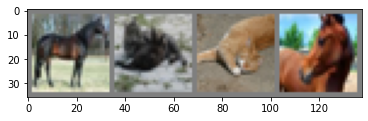

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## 定义一个函数来展示图像
def imshow(img):
    img=(img/2)+0.5 ## 将之前normalize 给去掉（unnormalize）
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0))) 

## 随机获取一个训练数据
dataiter=iter(trainloader) ## iter()产生一个DataLoaderIter
images,labels=dataiter.next() ## dataiter.next()产生一个batch，images就是图片tensor，label就是label

## 展示图像
imshow(torchvision.utils.make_grid(images)) ## Make a grid of images.
## 显示图像标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


#### note：
①
``np.transpose``就是求矩阵的转置，但是现在np.img是一个三维数组，np.transpose就是交换坐标轴顺序，其中``0,1,2分别代表x,y,z轴``，这里就相当于变换原来的x,y,z为y,z,x

PS：因为之前在将PIL转化成tensor的时候，改成了C * H * W，PIL或者numpy则是H * W * C

②
``iter(self)``函数来获取一个迭代器,对数据集中元素的索引进行迭代,``len(self)``方法返回迭代器中包含元素的长度，更多还在上一个note

参考：https://zhuanlan.zhihu.com/p/30934236

### 定义一个卷积神经网络
从之前的神经网络一节复制神经网络代码，并修改为输入3通道图像。

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=Net()

### 定义损失函数和优化器

我们使用交叉熵作为损失函数，使用带动量的随机梯度下降。

交叉熵损失函数：![](https://www.zhihu.com/equation?tex=L+%3D+%5Cfrac%7B1%7D%7BN%7D%5Csum_%7Bi%7D+L_i+%3D+%5Cfrac%7B1%7D%7BN%7D%5Csum_%7Bi%7D-%5By_i%5Ccdot+log%28p_i%29+%2B+%281-y_i%29%5Ccdot+log%281-p_i%29%5D+%5C%5C)

(参考吴恩达机器学习logistic regression部分)

带动量随机梯度下降：![](https://images4.pianshen.com/842/e4/e472825ceda079519cc824629580bfba.png)

(参考李飞飞CS231n)

In [10]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss() ## 先定义Loss，实这里把这个criterion叫成loss_fn更好理解
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9) ## 一般学习率都从小往大调（3倍3倍），momentun一般是选0.9或者0.99（参考上面说的课）

### 训练网络
我们只需在数据迭代器上循环，将数据输入给网络，并优化。

![](https://pic3.zhimg.com/80/v2-18f7f8e6cf5c827217f076483f16e986_720w.png)

In [11]:
for epoch in range(2): ## 两个epoch
    
    running_loss=0.0 ## 这里的running loss 是为了统计这整个epoch的loss总和
    
    for i,data in enumerate(trainloader,0): ## enumerate()，对一个序列/迭代器进行枚举，0表示从第一个开始，
        ## 返回一个枚举对象（二元元组，第一个元素是索引，第二个元素是这个迭代器这个位置的东西）
        inputs,labels=data
        
        ## 清空梯度
        optimizer.zero_grad()
        
        ## 正向传播
        outputs=net(inputs)
        
        ## 计算loss
        loss=criterion(outputs,labels)
        ## 反向传播
        loss.backward()
        ## 优化参数
        optimizer.step()
        
        ## 打印状态信息
        running_loss += loss.item()
        if i % 2000 == 1999:    # 每2000批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.094
[1,  4000] loss: 1.951
[1,  6000] loss: 1.954
[1,  8000] loss: 1.963
[1, 10000] loss: 2.010
[1, 12000] loss: 1.961
[2,  2000] loss: 1.987
[2,  4000] loss: 1.948
[2,  6000] loss: 1.953
[2,  8000] loss: 1.972
[2, 10000] loss: 1.997
[2, 12000] loss: 2.108
Finished Training


### 在测试集上测试网络
我们在整个训练集上进行了2次训练，但是我们需要检查网络是否从数据集中学习到有用的东西。

通过预测神经网络输出的类别标签与实际情况标签进行对比来进行检测。如果预测正确，我们把该样本添加到正确预测列表。

#### 第一步，显示测试集中的图片并熟悉图片内容。

GroundTruth:    cat  ship  ship plane


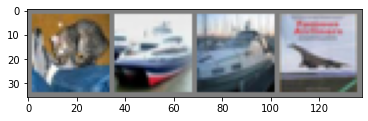

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

让我们看看神经网络认为以上图片是什么

In [13]:
outputs = net(images)

输出是10个标签的能量。(概率maybe，需要再加一层softmax之类的分类)

一个类别的能量越大，神经网络越认为它是这个类别。所以让我们得到最高能量的标签。

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck  ship  ship  ship


接下来让看看网络在整个测试集上的结果如何。


In [15]:
correct = 0 ## 记录被分类正确的图片数量
total = 0 ## 记录图片数量
with torch.no_grad(): ## 设置不要求梯度
    for data in testloader:
        images, labels = data
        outputs = net(images) ## 正向传播
        _, predicted = torch.max(outputs.data, 1) ## 输出预测的label
        total += labels.size(0)
        correct += (predicted == labels).sum().item() ## 预测正确加到correct里

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 27 %


结果看起来不错，至少比随机选择要好，随机选择的正确率为10%。
似乎网络学习到了一些东西。



在识别哪一个类的时候好，哪一个不好呢？（在每一个CIFAR每个类别上的表现）



In [16]:
class_correct = list(0. for i in range(10)) ## 每个类别单独计算
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze() 
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  2 %
Accuracy of   car : 36 %
Accuracy of  bird : 12 %
Accuracy of   cat :  3 %
Accuracy of  deer :  5 %
Accuracy of   dog : 15 %
Accuracy of  frog : 70 %
Accuracy of horse : 43 %
Accuracy of  ship : 47 %
Accuracy of truck : 37 %


## 在GPU上训练
把一个神经网络移动到GPU上训练就像把一个Tensor转换GPU上一样简单。并且这个操作会递归遍历有所模块，并将其参数和缓冲区转换为CUDA张量。

In [2]:
import torch
print(torch.cuda.is_available()) ## 查看cuda是否可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 确认我们的电脑支持CUDA，然后显示CUDA信息：
print(device)

True
cuda:0


In [ ]:
net.to(device) ## 将网络放到GPU中
inputs,labels=inputs.to(device),labels.to(device) ## 将x和y都放到device中，然后重复之前的训练+验证过程

本节的其余部分假定`device`是CUDA设备。

然后这些方法将递归遍历所有模块并将模块的参数和缓冲区
转换成CUDA张量：


```python
    net.to(device)
```

记住：inputs, targets 和 images 也要转换。

```python
        inputs, labels = inputs.to(device), labels.to(device)
```
为什么我们没注意到GPU的速度提升很多？那是因为网络非常的小。

**实践:** 
尝试增加你的网络的宽度（第一个``nn.Conv2d``的第2个参数，第二个``nn.Conv2d``的第一个参数，它们需要是相同的数字），看看你得到了什么样的加速。

**实现的目标**:

- 深入了解了PyTorch的张量库和神经网络
- 训练了一个小网络来分类图片

***译者注：后面我们教程会训练一个真正的网络，使识别率达到90%以上。***

### 多GPU训练

如果你想使用所有的GPU得到更大的加速，
请查看[数据并行处理](5_data_parallel_tutorial.ipynb)。

下一步？



-  doc:`训练神经网络玩电子游戏 </intermediate/reinforcement_q_learning>`
-  `在ImageNet上训练最好的ResNet`
-  `使用对抗生成网络来训练一个人脸生成器`
-  `使用LSTM网络训练一个字符级的语言模型`
-  `更多示例`
-  `更多教程`
-  `在论坛上讨论PyTorch`
-  `Slack上与其他用户讨论`




# 数据并行（多GPU）

ref:**Authors**: [Sung Kim](https://github.com/hunkim) and [Jenny Kang](https:/github.com/jennykang)

在这个教程里，我们将学习如何使用 ``DataParallel`` 来使用多GPU。 

PyTorch非常容易就可以使用多GPU，用如下方式把一个模型放到GPU上：

```python
    device = torch.device("cuda:0")
    model.to(device)
```
 GPU:
然后复制所有的张量到GPU上：
```python
    mytensor = my_tensor.to(device) ## 返回一个copy
```

请注意，只调用``my_tensor.to(device)``并没有复制张量到GPU上，而是返回了一个copy。所以你需要把它赋值给一个新的张量并在GPU上使用这个张量。

PyTorch默认将只使用一个GPU。

使用``DataParallel``可以轻易的让模型并行运行在多个GPU上。

```python
    model = nn.DataParallel(model)
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 导入和参数
导入PyTorch模块和定义参数。


In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

Device

In [4]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 虚拟数据集
制作一个虚拟（随机）数据集，
你只需实现 `__getitem__`

``__getitem__(self,key)``:

把类中的属性定义为序列，可以使用__getitem__()函数输出序列属性中的某个元素，这个方法返回与指定键想关联的值。对序列来说，键应该是0~n-1的整数，其中n为序列的长度。对映射来说，键可以是任何类型。

如果在类中定义了``__getitem__()``方法，那么它的实例对象（假设为P）就可以以P[key]形式取值，当实例对象做P[key]运算时，就会调用类中的__getitem__()方法。当对类的属性进行下标的操作时，首先会被__getitem__() 拦截，从而执行在__getitem__()方法中设定的操作，如赋值，修改内容，删除内容等。

```python
class Taget:
    def __init__(self,id):
        self.id=id
  
    def __getitem__(self, item):
        print('这个方法被调用')
        return self.id
  
a=Taget('This is id')
print(a.id)
print(a['python'])
 
## 输出：
'这个方法被调用'
'This is id'
```

简单来说，就是``__getitem__()``方法可以帮助我们返回这个class中和key关联的一个值

In [14]:
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)

## 定义一个简单模型
作为演示，我们的模型只接受一个输入，执行一个线性操作，然后得到结果。 

说明：``DataParallel``能在任何模型（CNN，RNN，Capsule Net等）上使用。

我们在模型内部放置了一条打印语句来打印输入和输出向量的大小。

请注意批次的秩为0时打印的内容。

In [15]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size) ## 只有一个fc层

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
              "output size", output.size())

        return output

## 创建一个模型和数据并行
这是本教程的核心部分。

首先，我们需要创建一个模型实例和检测我们是否有多个GPU。 

如果有多个GPU，使用``nn.DataParallel``来包装我们的模型。 然后通过``model.to(device)``把模型放到GPU上。

In [17]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!") ## 然而colab只给了一个gpu
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)

model.to(device)

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

## 运行模型
现在可以看到输入和输出张量的大小。

In [18]:
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
          "output_size", output.size())

1


## 结果
-------

当没有或者只有一个GPU时，对30个输入和输出进行批处理，得到了期望的一样得到30个输入和输出，但是如果你有多个GPU，你得到如下的结果。


2 GPUs
~

If you have 2, you will see:

.. code:: bash

    # on 2 GPUs
    Let's use 2 GPUs!
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
        In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])

3 GPUs
~

If you have 3 GPUs, you will see:

.. code:: bash

    Let's use 3 GPUs!
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])

8 GPUs
~~

If you have 8, you will see:

.. code:: bash

    Let's use 8 GPUs!
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])




## 总结
DataParallel会自动的划分数据，并将作业发送到多个GPU上的多个模型。
并在每个模型完成作业后，收集合并结果并返回。

更多信息请看这里：
https://pytorch.org/tutorials/beginner/former_torchies/parallelism_tutorial.html.